In [1]:
## import normal spikes for the data I care about...

# extract times when there were no ppseqs detected...might need to take sleep spikes for this
# turn this into coherent background noise
# then delete gaps and add in the ppseqs sequences 
# check this looks normal


# import awake ppseq output
# import sleep ppseq output

# import 

In [319]:
import os
import numpy as np
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt


# Define colors
colors = {
    'yellow': '#E2DC92',
    'green': '#69BD9D',
    'blue': '#1C79B5',
    'red': '#BE575F',
    'dark_blue': '#264999',
    'purple': '#724F94',
    'gold': '#C6963E'
}


def set_paths(mouse_session_recording, PP_PATH, DAT_PATH):

    # Set dat_path
    dat_path = None
    for file_ in os.listdir(DAT_PATH):
        if mouse_session_recording.split('_')[0] in file_ and mouse_session_recording.split('_')[1] == file_[-1]:
            dat_path = os.path.join(DAT_PATH, file_)
            break

    if dat_path:
        for recording in os.listdir(os.path.join(DAT_PATH, dat_path)):
            if recording.split('_')[0][9:] == mouse_session_recording.split('_')[-1]:
                dat_path = os.path.join(dat_path, recording)
                break

    # Set tracking path
    tracking_path = None
    for file_ in os.listdir(os.path.join(dat_path, "video", "tracking")):
        if 'task' in file_ and 'clock' not in file_:
            tracking_path = os.path.join(dat_path, "video", "tracking", file_) + '\\'
            break

    # Set video paths
    cam_path = None
    back_cam_avi_path = None
    side_cam_avi_path = None
    for file_ in os.listdir(os.path.join(dat_path, "video", "videos")):
        if 'task' in file_ and 'clock' not in file_:
            cam_path = os.path.join(dat_path, "video", "videos", file_) + '\\'
            for vid_file in os.listdir(cam_path):
                if 'back' in vid_file and '.avi' in vid_file:
                    back_cam_avi_path = os.path.join(cam_path, vid_file)
                if 'side' in vid_file and '.avi' in vid_file:
                    side_cam_avi_path = os.path.join(cam_path, vid_file)
            break

    return dat_path, tracking_path, cam_path, back_cam_avi_path, side_cam_avi_path

def split_list(nums):
    sublists = []
    current_sublist = [nums[0]]
    current_element = nums[0]
    for i in range(1,len(nums)):
        if nums[i] == current_element:
            current_sublist.append(nums[i])
        else:
            sublists.append(current_sublist)
            current_sublist = [nums[i]]
            current_element = nums[i]
    sublists.append(current_sublist)
    return sublists

from datetime import date
import json
import os, pickle


## save this data out in correct format
def create_spike_time_vectors(spike_times,clusters):
    spiketimevectors = []
    for i in np.unique(clusters):
        spiketimevectors = spiketimevectors + [spike_times[np.where(clusters==i)[0]]]
    return spiketimevectors

def save_params_as_json(args, save_path, file_name):
    config_filename = os.path.join(save_path, file_name)
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    with open(config_filename, 'w') as config_file:
        json.dump(args, config_file, indent=4)
    return(config_filename)

def write_text_file(spikes, filename="spike_data.txt"):
    f = open(filename, "w")
    for i, spike_train in enumerate(spikes):
        for t, spike_time in enumerate(spike_train):
            mssg = "{:.1f}\t{:10.4f}\n".format(i + 1, spike_time)
            f.write(mssg)
    f.close()
    return filename

# Set paths

In [604]:
mouses = ["136_1_3","148_2_2","149_1_1","178_1_6","178_1_7","178_2_1","178_2_2","178_2_3","178_2_4","255_1_2","262_1_5","269_1_2","270_1_3"]

mouse = mouses[12]


mouse_session_recording = mouse

print(mouse)

sleep_path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\finalised_output\striatum\paper_submission\post_sleep\\"
awake_path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\finalised_output\striatum\awake\\"

DAT_PATH = r"Z:\projects\sequence_squad\organised_data\animals\\"


270_1_3


# load in awake (not needed)

In [605]:
# ## load awake data and ppseq labelling:

for file in os.listdir(awake_path):
    if mouse_session_recording in file:
        print(file)
        PP_PATH = os.path.join(awake_path,file) + '\\'

        # set other paths
        dat_path, tracking_path, cam_path, back_cam_avi_path, side_cam_avi_path = set_paths(mouse_session_recording, PP_PATH, DAT_PATH)

        print('\n')
        print("LOADING processed_spike_data")
        ### load in releavent things:

        with open(PP_PATH +"\\analysis_output\\" + "latent_event_history_df_split.pickle", "rb") as input_file:
            latent_event_history_df_split = pickle.load(input_file)
            
        with open(PP_PATH + "\\analysis_output\\" + "spikes_seq_type_adjusted.pickle", "rb") as input_file:
            spikes_seq_type_adjusted = pickle.load(input_file) 
        neuron_order = np.load(PP_PATH + "\\analysis_output\\" + 'neuron_order.npy')
        ordered_preferred_type = np.load(PP_PATH + "\\analysis_output\\" + 'ordered_preferred_type.npy')
        neuron_index = np.load(PP_PATH + "\\analysis_output\\" + 'neuron_index.npy')

#         # Opening JSON file
#         f = open(PP_PATH + r'\config_file.json')
#         # returns JSON object as a dictionary
#         config = eval(json.load(f))
#         ## load in the timespan used for pppseq:
#         input_params_path = os.path.join(PP_PATH,'trainingData\\') + ('params_' + mouse_session_recording +'.json')
#         # Opening JSON file
#         f = open(input_params_path)
#         # returns JSON object as  a dictionary
#         input_config = json.load(f)
#         behav_time_interval_start = input_config['time_span'][0]
#         print(f"      A corresponding time span has been found. Time span set to {behav_time_interval_start}")

#         ## LOAD behaviour data
#         print('\n')
#         print("LOADING BEHAV DATA")
#         behav_sync = pd.read_csv(dat_path + r'\behav_sync\2_task\Behav_Ephys_Camera_Sync.csv')
#         transitions = pd.read_csv(dat_path + r'\behav_sync\2_task\Transition_data_sync.csv')
#         behav_mask = (behav_sync.PokeIN_EphysTime>behav_time_interval_start[0])*(behav_sync.PokeIN_EphysTime<behav_time_interval_start[1])
#         poke_in_times = (behav_sync[behav_mask].PokeIN_EphysTime) - behav_time_interval_start[0]
#         ports = behav_sync[behav_mask].Port
#         print('done')
    


270_1_3_run_0606023_0209


LOADING processed_spike_data


In [606]:
# total_length = np.diff(behav_time_interval_start)[0]

# # Don't edit this - my code now tries to fit and rearrange these based on most often occurring seqs 
# color_list = ['---', colors['red'], colors['green'], colors['yellow'], colors['blue'], colors['purple'], colors['gold'], colors['dark_blue']]

# # Plot sequences - basic
# timeframe = [0, total_length - 1]
# mask = (spikes_seq_type_adjusted.timestamp > timeframe[0]) & (spikes_seq_type_adjusted.timestamp < timeframe[-1])

# # Plotting
# fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# # Plot background in grey
# background_keep_mask = spikes_seq_type_adjusted[mask].sequence_type_adjusted <= 0
# ax.scatter(spikes_seq_type_adjusted[mask][background_keep_mask].timestamp, neuron_order[mask][background_keep_mask], marker='o', s=40, linewidth=0, color='grey', alpha=0.5)

# # Plot spikes without background
# background_remove_mask = spikes_seq_type_adjusted[mask].sequence_type_adjusted >= 0
# c_ = np.array(color_list)[spikes_seq_type_adjusted[mask][background_remove_mask].sequence_type_adjusted.values.astype(int)]
# ax.scatter(spikes_seq_type_adjusted[mask][background_remove_mask].timestamp, neuron_order[mask][background_remove_mask], marker='o', s=40, linewidth=0, color=c_, alpha=1)

# # Add chunk lines
# # Work out ordering chunk sizes
# split_lists = split_list(ordered_preferred_type[neuron_index])
# lens = [len(list_) for list_ in split_lists]
# chunks = [sum(lens[:int(np.unique(ordered_preferred_type)[-1] + 1)])] + lens[int(np.unique(ordered_preferred_type)[-1] + 1):]

# # Plot seq dividing lines
# for i in range(len(chunks)):
#     ax.axhline(y=np.cumsum(chunks)[i], color='grey', linestyle='--')

# load in sleep spikes



LOADING processed_spike_data


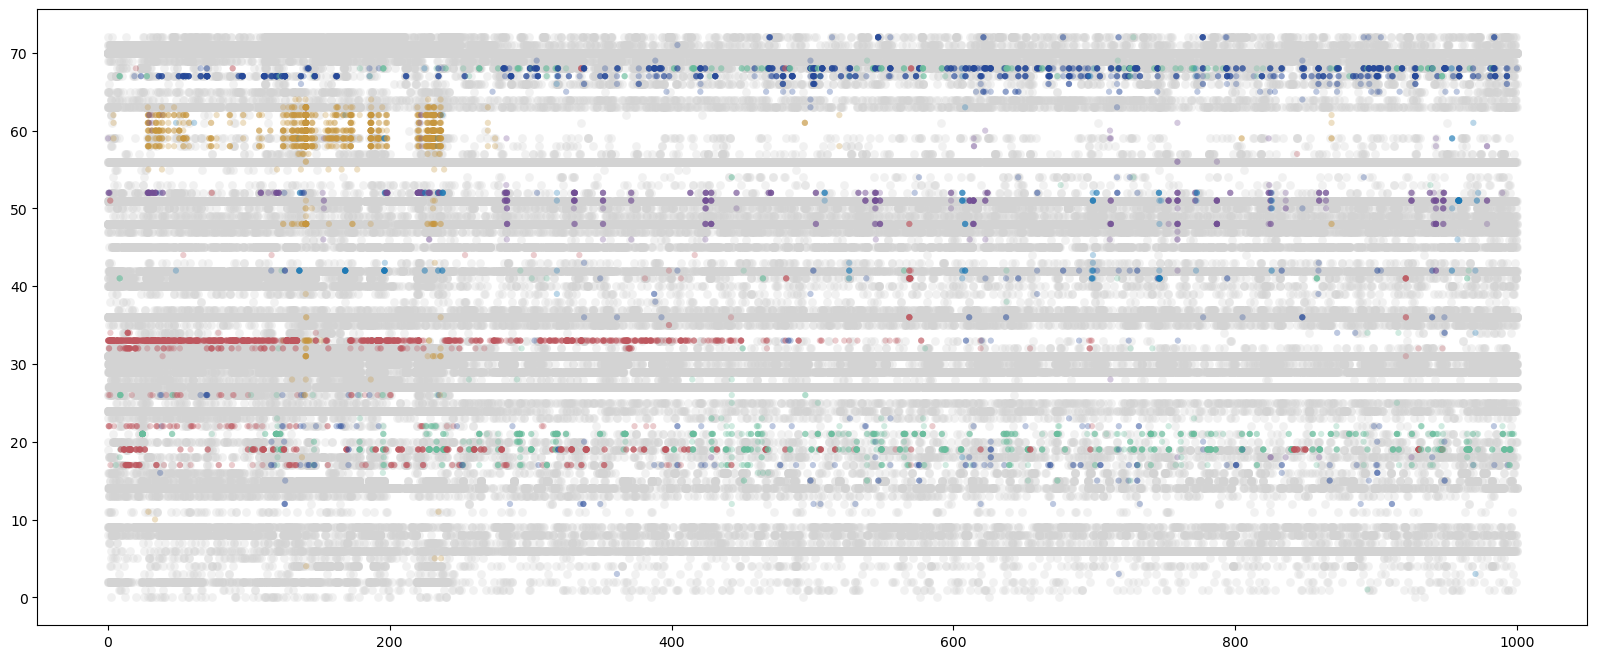

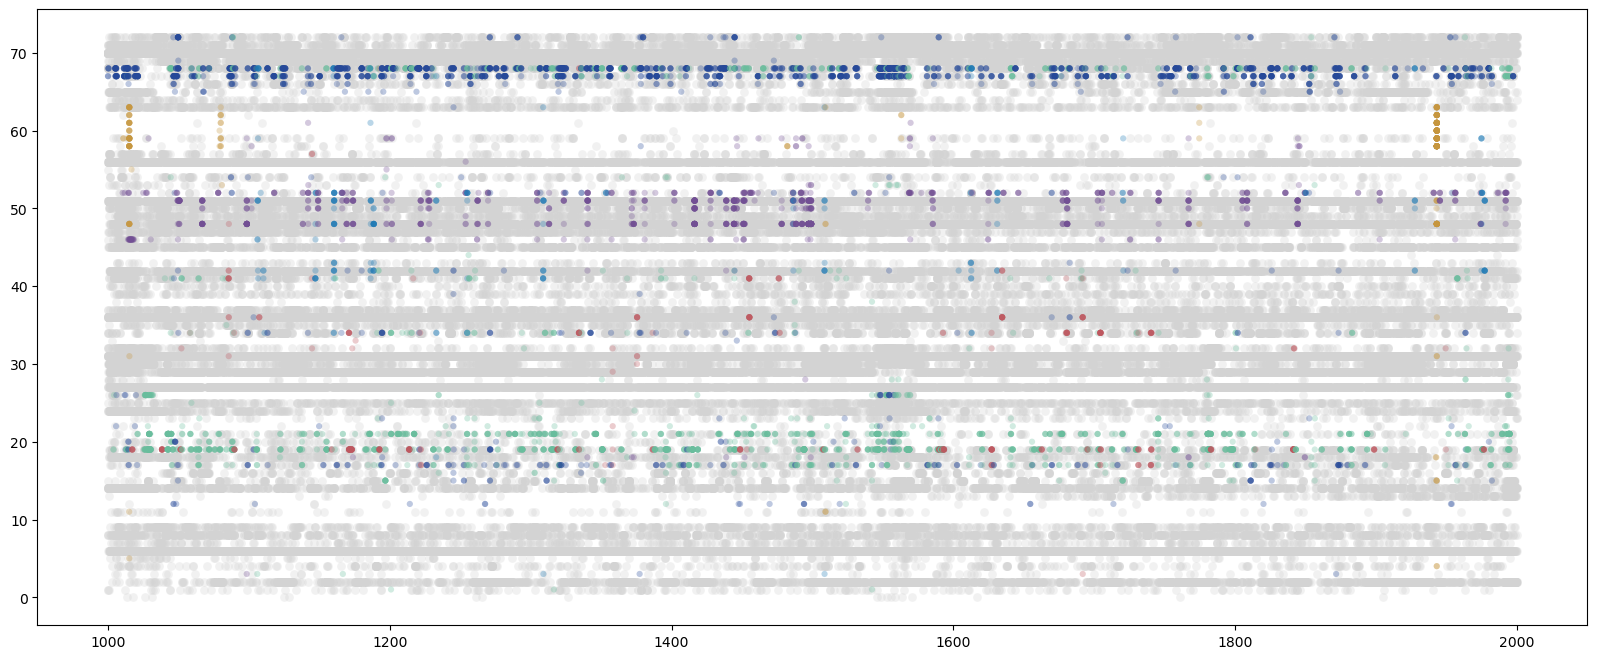

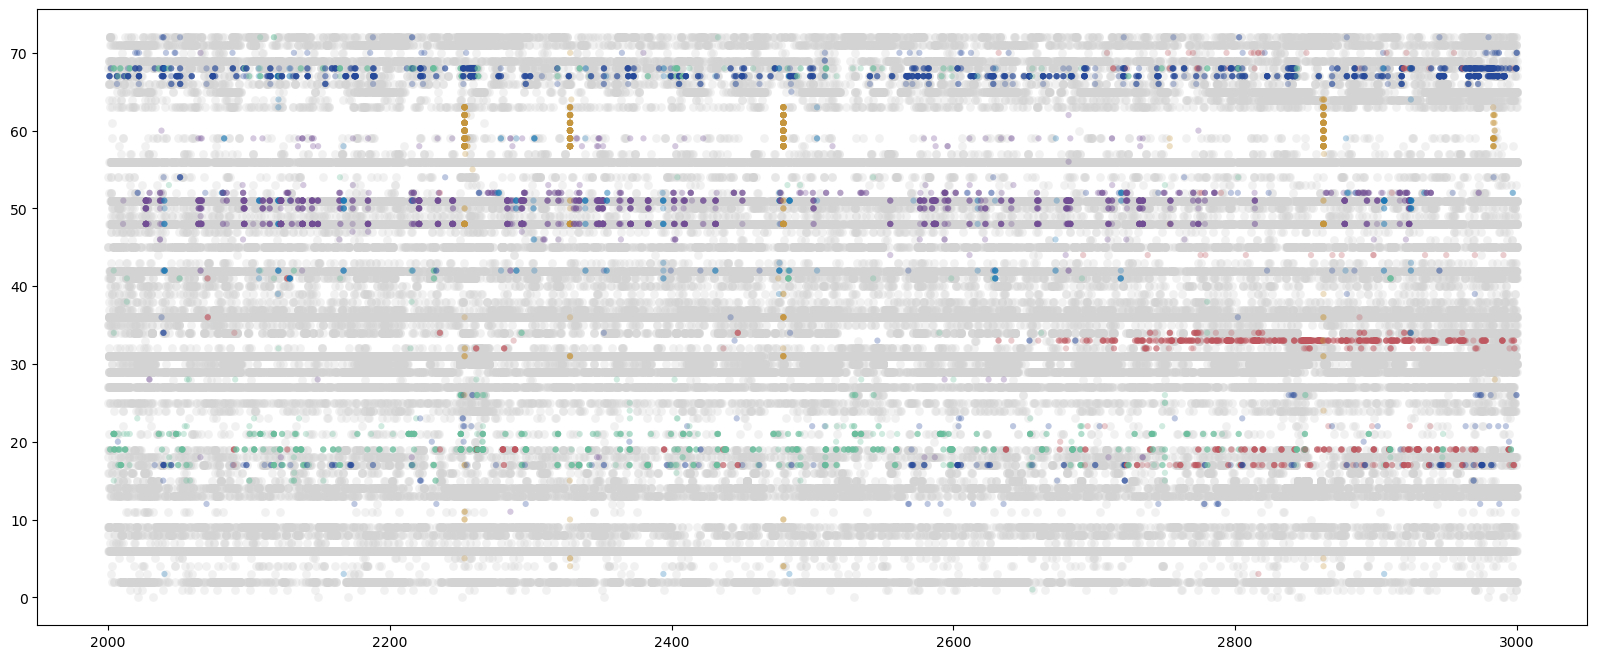

In [607]:

## load sleep data and ppseq labelling:

mouse_session_recording = mouse
for file in os.listdir(sleep_path):
    if mouse_session_recording in file:
        PP_PATH = os.path.join(sleep_path,file) + '\\'

        # set other paths
        dat_path, tracking_path, cam_path, back_cam_avi_path, side_cam_avi_path = set_paths(mouse_session_recording, PP_PATH, DAT_PATH)

        print('\n')
        print("LOADING processed_spike_data")
        ### load in releavent things:
        
        ### save out chunk stuff:
        chunk_stuff = []
        
        count = 0
        for chunk_file in os.listdir(PP_PATH +"\\_final_analysis_output\\"):
            if 'chunk' in chunk_file:
                chunk = chunk_file
                
                unfiltered_spikes_data = pd.read_csv(PP_PATH + "\\_final_analysis_output\\" + chunk + "\\unfiltered_spikes_data.csv") 
                # Define neuron order
                neuron_permute_loc = np.zeros(len(neuron_index))
                for i in range(len(neuron_index)):
                    neuron_permute_loc[i] = int(list(neuron_index).index(i))
                neuron_order = neuron_permute_loc[(unfiltered_spikes_data.neuron - 1).astype(int)]

                fig, ax = plt.subplots(1, 1,figsize=(20, 8))

                # Plot background in grey
                background_keep_mask = (unfiltered_spikes_data.sequence_type_adjusted < 0) | (unfiltered_spikes_data.sequence_type_adjusted >= 7.0)
                ax.scatter(unfiltered_spikes_data[background_keep_mask].timestamp, neuron_order[background_keep_mask],
                marker='o', s=40, linewidth=0, color='lightgrey', alpha=0.3)
                background_remove_mask = (unfiltered_spikes_data.sequence_type_adjusted >= 0) * \
                            (unfiltered_spikes_data.sequence_type_adjusted != 7.0) * \
                            (unfiltered_spikes_data.sequence_type_adjusted != 8.0)
                c_ = np.array(list(colors.values())+['pink','lightblue', 'k'])[unfiltered_spikes_data[background_remove_mask].sequence_type_adjusted.astype(int)]
                ax.scatter(unfiltered_spikes_data.timestamp[background_remove_mask], neuron_order[background_remove_mask],marker = 'o', s=20, linewidth=0,color = c_ ,alpha=0.3)
                
                if count == 0:
                    spikes_df = unfiltered_spikes_data
                else:
                    spikes_df = pd.concat([spikes_df, unfiltered_spikes_data]).reset_index(drop=True)
                count += 1
                
                


# pull out times when ppseq spikes to background ratio is low

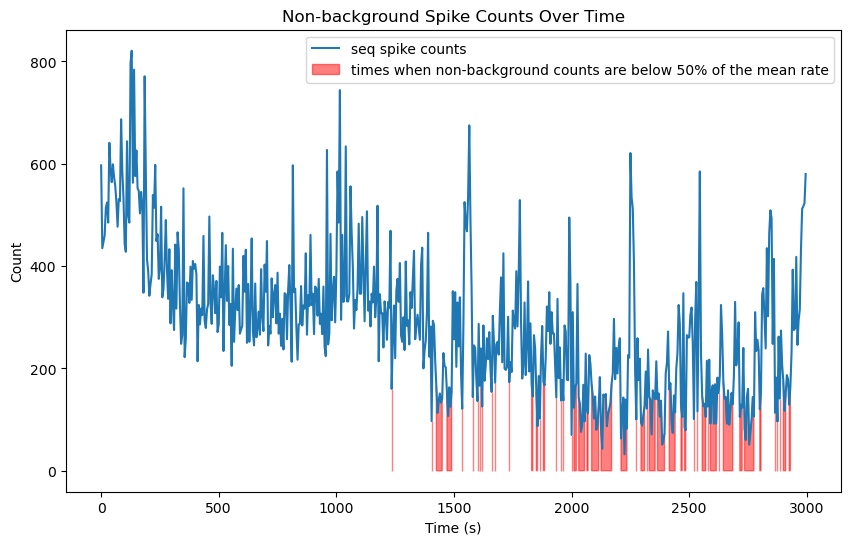

In [608]:
ordered_spike_types = spikes_df.sequence_type_adjusted[np.argsort(spikes_df.timestamp)].values
ordered_spike_times = spikes_df.timestamp[np.argsort(spikes_df.timestamp)].values

background_occurances = (ordered_spike_types == -1).astype(int)


bin_size = 5  # Define the bin size in seconds
bins = np.arange(ordered_spike_times.min(), ordered_spike_times.max() + bin_size, bin_size)
seq_spike_counts, _ = np.histogram(ordered_spike_times[ordered_spike_types != -1], bins=bins)
background_counts, _ = np.histogram(ordered_spike_times[ordered_spike_types == -1], bins=bins)

relative_count = seq_spike_counts/background_counts

mean_rate = np.mean(seq_spike_counts)
threshold = 0.6 * mean_rate
# threshold = 0.7 * mean_rate

highlight_bins = seq_spike_counts < threshold

plt.figure(figsize=(10, 6))
plt.plot(bins[:-1], seq_spike_counts, label='seq spike counts')
plt.fill_between(bins[:-1], seq_spike_counts, where=highlight_bins, color='red', alpha=0.5, label='times when non-background counts are below 50% of the mean rate')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Non-background Spike Counts Over Time')
plt.legend()
plt.show()


C:\Users\Emmett\AppData\Local\Temp\ipykernel_13248\954077494.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_activity_spikes_pieces[i].timestamp = low_activity_spikes_pieces[i].timestamp - min(low_activity_spikes_pieces[i].timestamp)


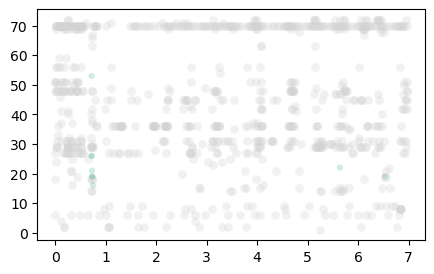

In [609]:
# Split the low activity spikes into individual pieces based on the bins
low_activity_spikes_pieces = []

for bin_index in np.where(highlight_bins)[0]:
    bin_start = bins[bin_index] - 1
    bin_end = bins[bin_index + 1] + 1
    bin_mask = (spikes_df.timestamp >= bin_start) & (spikes_df.timestamp < bin_end)
    low_activity_spikes_pieces.append(spikes_df[bin_mask])

# reset timings for each piece
for i in range(len(low_activity_spikes_pieces)):
    low_activity_spikes_pieces[i].timestamp = low_activity_spikes_pieces[i].timestamp - min(low_activity_spikes_pieces[i].timestamp)


# Plot the low activity spikes
for i,unfiltered_spikes_data in enumerate(low_activity_spikes_pieces):

    fig, ax = plt.subplots(1, 1, figsize=(5, 3)) 
    
    # Define neuron order
    neuron_permute_loc = np.zeros(len(neuron_index))
    for i in range(len(neuron_index)):
        neuron_permute_loc[i] = int(list(neuron_index).index(i))
    neuron_order = neuron_permute_loc[(unfiltered_spikes_data.neuron - 1).astype(int)]

    # Plot background in grey
    background_keep_mask = (unfiltered_spikes_data.sequence_type_adjusted < 0) | (unfiltered_spikes_data.sequence_type_adjusted >= 7.0)
    ax.scatter(unfiltered_spikes_data[background_keep_mask].timestamp, neuron_order[background_keep_mask],
    marker='o', s=40, linewidth=0, color='lightgrey', alpha=0.3)
    background_remove_mask = (unfiltered_spikes_data.sequence_type_adjusted >= 0) * \
                (unfiltered_spikes_data.sequence_type_adjusted != 7.0) * \
                (unfiltered_spikes_data.sequence_type_adjusted != 8.0)
    c_ = np.array(list(colors.values())+['pink','lightblue', 'k'])[unfiltered_spikes_data[background_remove_mask].sequence_type_adjusted.astype(int)]
    ax.scatter(unfiltered_spikes_data.timestamp[background_remove_mask], neuron_order[background_remove_mask],marker = 'o', s=20, linewidth=0,color = c_ ,alpha=0.3)
    
    break



# trim this into a 600s period

C:\Users\Emmett\AppData\Local\Temp\ipykernel_13248\1143406380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_activity_spikes_pieces[i]['timestamp'] += max_timestamp - low_activity_spikes_pieces[i]['timestamp'].min() + 1


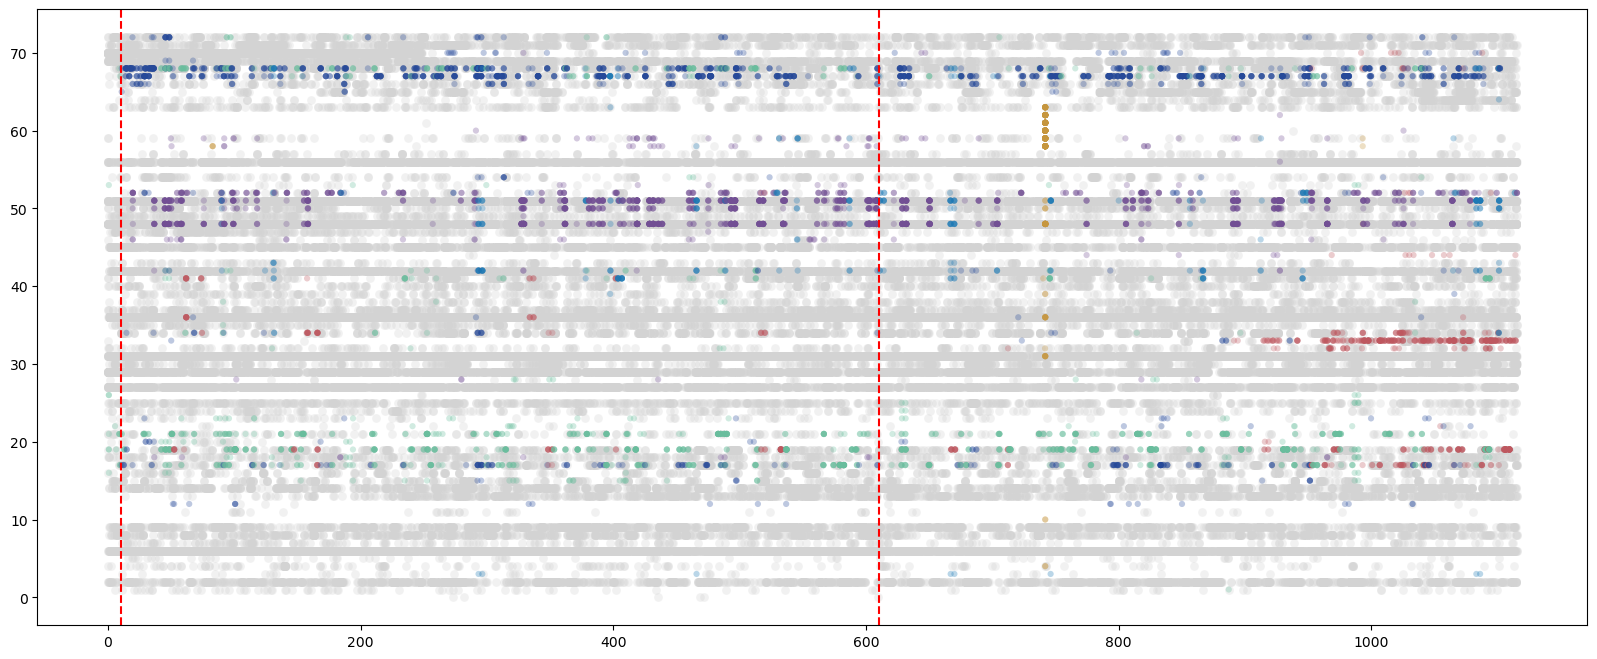

In [610]:
## chose trim range:
start = 10
end = start + 600

# Make the timestamps continuous
for i in range(1, len(low_activity_spikes_pieces)):
    max_timestamp = low_activity_spikes_pieces[i-1]['timestamp'].max()
    low_activity_spikes_pieces[i]['timestamp'] += max_timestamp - low_activity_spikes_pieces[i]['timestamp'].min() + 1

combined_low_activity_spikes = pd.concat(low_activity_spikes_pieces).reset_index(drop=True)

fig, ax = plt.subplots(1, 1, figsize=(20, 8)) 

# Define neuron order
neuron_permute_loc = np.zeros(len(neuron_index))
for i in range(len(neuron_index)):
    neuron_permute_loc[i] = int(list(neuron_index).index(i))
neuron_order = neuron_permute_loc[(combined_low_activity_spikes.neuron - 1).astype(int)]

# Plot background in grey
background_keep_mask = (combined_low_activity_spikes.sequence_type_adjusted < 0) | (combined_low_activity_spikes.sequence_type_adjusted >= 7.0)
ax.scatter(combined_low_activity_spikes[background_keep_mask].timestamp, neuron_order[background_keep_mask],
marker='o', s=40, linewidth=0, color='lightgrey', alpha=0.3)
background_remove_mask = (combined_low_activity_spikes.sequence_type_adjusted >= 0) * \
            (combined_low_activity_spikes.sequence_type_adjusted != 7.0) * \
            (combined_low_activity_spikes.sequence_type_adjusted != 8.0)
c_ = np.array(list(colors.values())+['pink','lightblue', 'k'])[combined_low_activity_spikes[background_remove_mask].sequence_type_adjusted.astype(int)]
ax.scatter(combined_low_activity_spikes.timestamp[background_remove_mask], neuron_order[background_remove_mask],marker = 'o', s=20, linewidth=0,color = c_ ,alpha=0.3)

# draw the outline of a rectannlge on the plot 
plt.axvline(x=start, color='r', linestyle='--')
plt.axvline(x=end, color='r', linestyle='--')

# trim down

trimmed_combined_low_activity_spikes = combined_low_activity_spikes[(combined_low_activity_spikes.timestamp > start)*(combined_low_activity_spikes.timestamp < end)]   
trimmed_combined_low_activity_spikes.reset_index(drop=True, inplace=True)


In [611]:
# stop! and check

# circular shiffle to make shuffled background

In [612]:
# rebase timestamps
trimmed_combined_low_activity_spikes.timestamp  = trimmed_combined_low_activity_spikes.timestamp - min(trimmed_combined_low_activity_spikes.timestamp)

#do a circular shuffle of the spikes.

def circular_shift(group,time_range):
    # shift_amount = np.random.uniform(-timestamp_range / 2, timestamp_range / 2)
    shift_amount = np.random.uniform(0, time_range)
    # Apply the circular shift
    group['timestamp'] = (group['timestamp'] + shift_amount) % time_range 
    
    return group

spikes = trimmed_combined_low_activity_spikes.timestamp.values
neurons = trimmed_combined_low_activity_spikes.neuron.values

spikes_df = pd.DataFrame({'neuron': neurons, 'timestamp': spikes})

# find range:
time_range = round(max(spikes) - min(spikes))
# Apply the circular shift to each neuron group
spikes_df_shifted = spikes_df.groupby('neuron').apply(circular_shift, time_range=time_range)
# Reset the index to flatten the MultiIndex created by groupby
spikes_df_shifted = spikes_df_shifted.reset_index(drop=True)
#Reorder the spikes for each neuron so that they are in time order
spikes_df_shifted = spikes_df_shifted.sort_values(by=['neuron', 'timestamp']).reset_index(drop=True) 

C:\Users\Emmett\AppData\Local\Temp\ipykernel_13248\2719468774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_combined_low_activity_spikes.timestamp  = trimmed_combined_low_activity_spikes.timestamp - min(trimmed_combined_low_activity_spikes.timestamp)
C:\Users\Emmett\AppData\Local\Temp\ipykernel_13248\2719468774.py:22: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  spikes_df_shifted = spik

# load synthetic spikes and choose those to insert

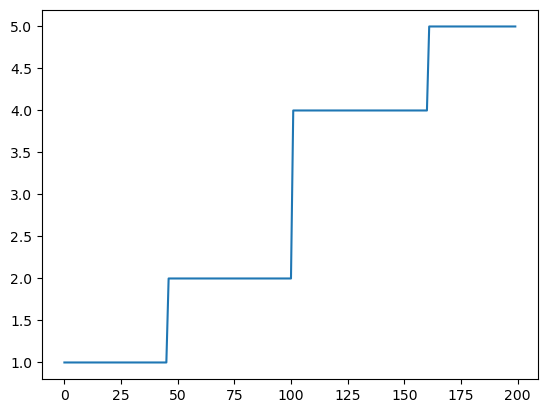

In [613]:
## load in synthetic sequences 

synth_path = r"Z:\projects\Emmett\synthetic_data_rerun\synthetic_spikes\\"

base_path = os.path.join(synth_path, mouse) 
ppseq_events = pd.read_pickle(base_path + r"\standard_insertion\ppseq_events.pkl")


### choose randlonly and ans evenly as possible which seqs to implant: 

seq_list = list(ppseq_events.seq_type)
indices = np.array([i for i in range(len(np.array(seq_list)))])

    
indices_all = []
for item in np.unique(seq_list):
    indices_all += [indices[np.array(seq_list) == item]]
    
chosen_inds = []
while len(chosen_inds) < 200:
    for i in range(len(indices_all)):
        if len(indices_all[i]) > 0:
            if len(chosen_inds) < 200:
                random_idx = np.random.choice(len(indices_all[i]))
                removed_value = indices_all[i][random_idx]
                indices_all[i] = np.delete(indices_all[i], random_idx)

                chosen_inds += [removed_value]
                
chosen_inds = np.sort(chosen_inds)


plt.plot(np.sort(ppseq_events.seq_type.values[np.array(chosen_inds)]))

# filename = 'chosen_inds'
# with open(out_path + filename, 'wb') as fp:
#     pickle.dump(chosen_inds, fp)


1.6350341032637061
min diff should be at least 2s, if not try again


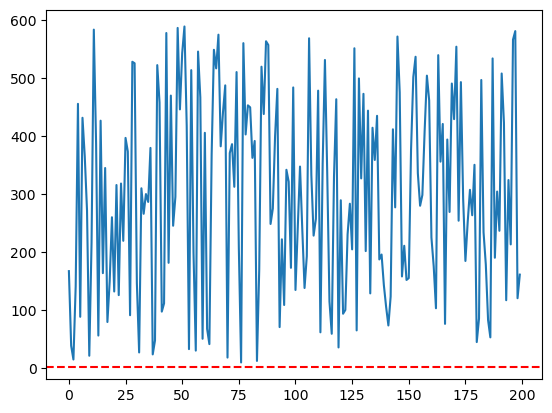

In [614]:
### distribute sequences across timeframe so they are nice and seperated... 
import random

max_time = round(max(trimmed_combined_low_activity_spikes.timestamp.values))

# Set the number of time points you want
num_points = len(chosen_inds)

# Generate a set of evenly spaced time points
time_points = np.linspace(10, max_time-10, num_points)

# Add some random variation to the spacing
time_points += np.random.normal(scale=0.3, size=num_points)

# Sort the time points in ascending order
time_points = np.sort(time_points)

print(min(np.diff(time_points)))
print("min diff should be at least 2s, if not try again")

#shuffle them
random.shuffle(time_points)
plt.plot(time_points)
plt.axhline(y = 2, color='r', linestyle='--')

# create synthetic data 

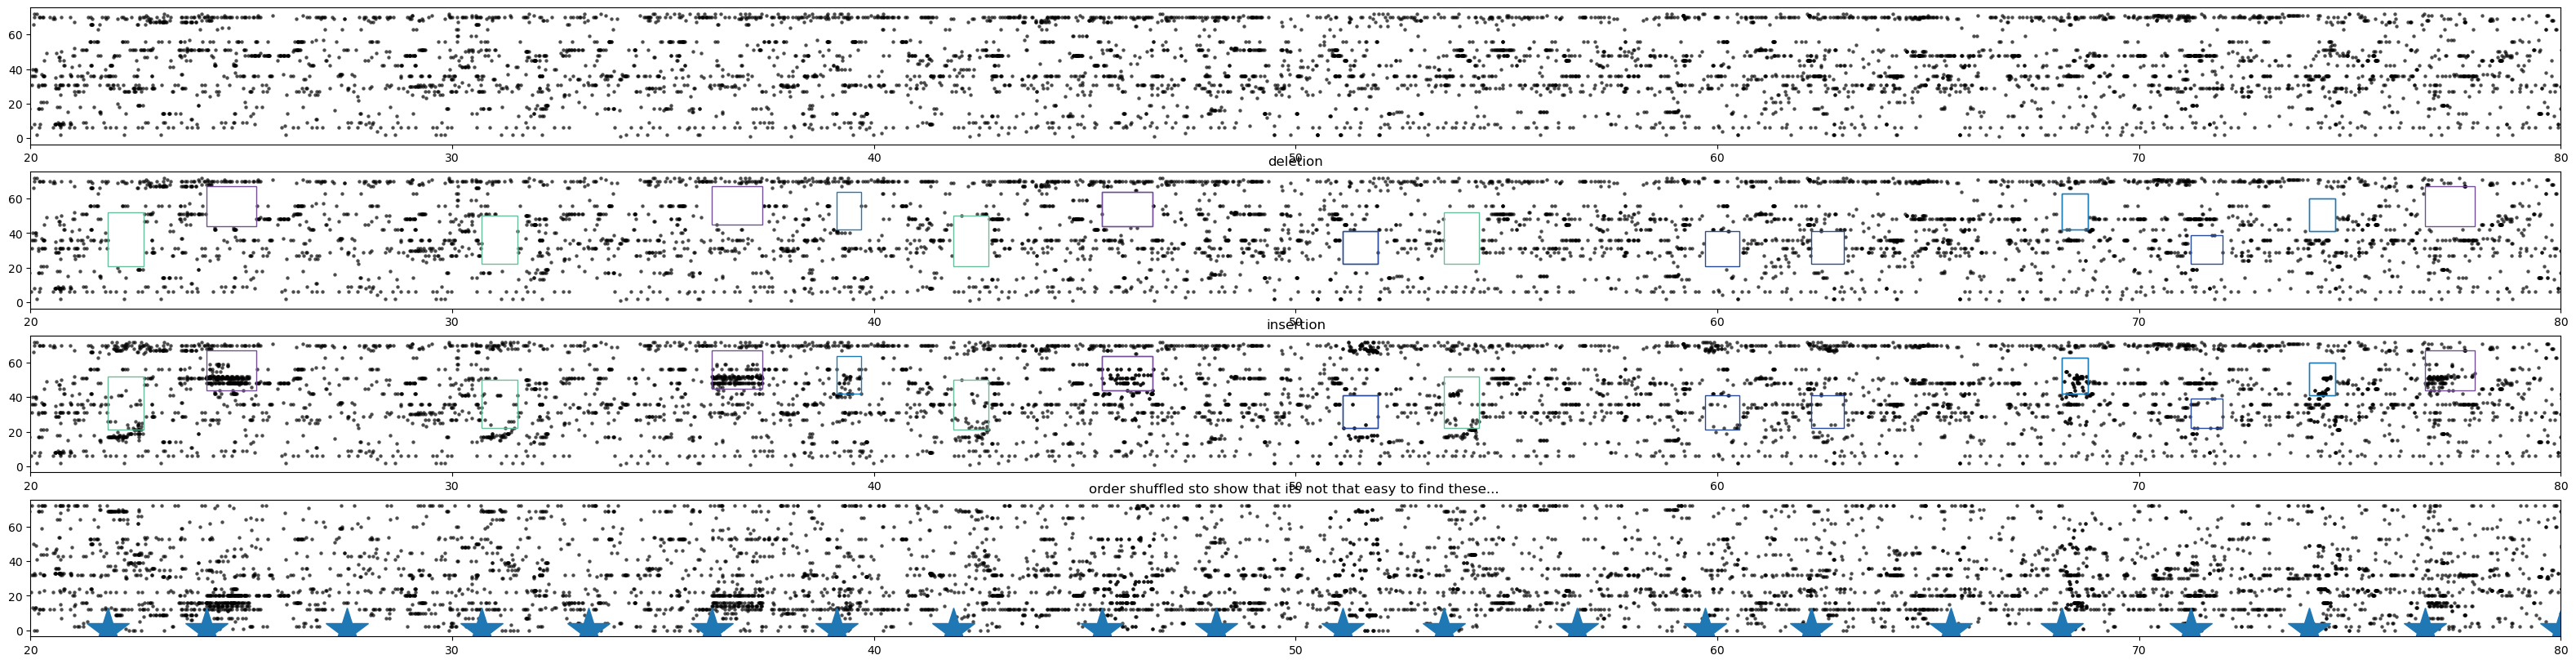

In [615]:
from matplotlib.patches import Rectangle

out_df = ppseq_events

# shift chosen inds to new distributed places
for i,index in enumerate(chosen_inds):
    profile = out_df.spike_profiles[index]   
    relative_spike_times = out_df.spike_profiles[index].timestamp.values - min(out_df.spike_profiles[index].timestamp.values)
    out_df.spike_profiles[index]['timestamp'] = relative_spike_times + time_points[i]

updated_neurons = spikes_df_shifted.neuron.values
updated_spikes = spikes_df_shifted.timestamp.values
updated_neuron_order = neuron_permute_loc[updated_neurons.astype(int)-1]



rects = []
rects2 = []

for index in chosen_inds:

    profile = out_df.spike_profiles[index]    
    # Create a Rectangle patch
    top = max(out_df.neuron_order[index])
    bottom = min(out_df.neuron_order[index])
    left = min(profile.timestamp)
    right = max(profile.timestamp)

    timemask = (updated_spikes>left)*(updated_spikes<right)
    neuron_mask = (updated_neuron_order>bottom)*(updated_neuron_order<top)
    mask = np.invert(timemask * neuron_mask)

    updated_neurons = updated_neurons[mask]
    updated_spikes = updated_spikes[mask]
    updated_neuron_order = updated_neuron_order[mask]
    
    col_ = list(colors.values())[int(out_df.seq_type[index])]
    rects +=  [Rectangle((left, bottom), right-left, top-bottom, linewidth=1, edgecolor=col_, facecolor='none') ]
    rects2 +=  [Rectangle((left, bottom), right-left, top-bottom, linewidth=1, edgecolor=col_, facecolor='none') ]

## then implant seqs
spike_insertion = list(updated_spikes)
neuron_insertion = list(updated_neurons)
#save out for future plotting
seq_types = []
insertion_ids = []
profiles = []
for index in chosen_inds:
    profile = out_df.spike_profiles[index]   
    spike_insertion +=  list(profile.timestamp)
    neuron_insertion += list(profile.neuron)
    
    seq_types +=  [out_df.seq_type[index]]
    insertion_ids += [index]
    profiles += [profile]
    

insertion_df = pd.DataFrame(
{'seq_type' : seq_types,
'insertion_id' : insertion_ids,
'inserted_profile': profiles})

    
fig,[ax1,ax2,ax3,ax4]= plt.subplots(4, 1,figsize=(40, 10))
# plot origonal
ax1.scatter(spikes_df_shifted.timestamp.values, neuron_permute_loc[spikes_df_shifted.neuron.values.astype(int)-1],marker = 'o', s=10, linewidth=0,color = 'black' ,alpha=0.7)
# plot deleted
ax2.set_title('deletion')


permuted_neuron_order_new = neuron_permute_loc[updated_neurons.astype(int)-1]

ax2.scatter(updated_spikes, permuted_neuron_order_new,marker = 'o', s=10, linewidth=0,color = 'black' ,alpha=0.7)

# Add the patch to the Axes
for rect in rects:
    ax2.add_patch(rect)

# # plot insertion
ax3.set_title('insertion')

inserted_neuron_order = neuron_permute_loc[np.array(neuron_insertion).astype(int)-1]

ax3.scatter(spike_insertion, inserted_neuron_order,marker = 'o', s=10, linewidth=0,color = 'black' ,alpha=0.7)
for rect in rects2:
    ax3.add_patch(rect)
    
ax4.set_title('order shuffled sto show that its not that easy to find these... ')

shuffled_order_permute_loc = np.random.permutation(neuron_permute_loc)
shuffle_permuted_neuron_order_new = shuffled_order_permute_loc[np.array(neuron_insertion).astype(int)-1]
ax4.scatter(spike_insertion, shuffle_permuted_neuron_order_new,marker = 'o', s=10, linewidth=0,color = 'black' ,alpha=0.7)


ax1.set_xlim([20,80])
ax2.set_xlim([20,80])
ax3.set_xlim([20,80])
ax4.set_xlim([20,80])


ax4.plot(time_points,np.zeros(len(time_points)), '*',markersize = 40)

# check if the total neurons has changed + fix nans



In [616]:
#remove any nans 
no_nan_spike_insertion = []
no_nan_neuron_insertion = []
no_nan_inserted_neuron_order = []
for i in range(len(spike_insertion)):
    if not np.isnan(spike_insertion[i]):
        no_nan_spike_insertion.append(spike_insertion[i])
        no_nan_neuron_insertion.append(neuron_insertion[i])
        no_nan_inserted_neuron_order.append(inserted_neuron_order[i])
    else:
        print('nan found')


### if there are anhy neurons missing just as a nominal spike to the start so that ppseq doesnt break
for awake_neuron in spikes_seq_type_adjusted.neuron.unique():
    if not awake_neuron in np.unique(no_nan_neuron_insertion):
        print(awake_neuron)
        no_nan_neuron_insertion += [awake_neuron]
        no_nan_spike_insertion += [1]
        no_nan_inserted_neuron_order += [np.unique(no_nan_inserted_neuron_order)[-1] + 1]


18.0
61.0


# save out this data for non shuffled insertions

In [617]:
## save out as it is 

## save out instertion data 

today = date.today()

out_path = r"Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\non_shuffled\\"
if not os.path.isdir(out_path):
    os.makedirs(out_path)
insertion_df.to_pickle(out_path +  mouse + "_insertion_spike_profiles_" + str(today))




model_dir = r'Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\non_shuffled\prepared_data\\'
CHECK_FOLDER = os.path.isdir(model_dir)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(model_dir)
    print("created folder : ", model_dir)

json_ = {'full_path_to_data': dat_path,
 'mouse_implant_recording': mouse_session_recording,
 'output_filename': mouse_session_recording  ,
 'save_path': model_dir,
 'time_span': [[0,600]],
 'single_or_multiunits': 'both',
 'region': 'striatum',
 'use_emmett_curation': False,
 'max_firing_rate': 15.0,
 'align_to_zero': True,
 'shuffle': 'None',
 'visualise': True,
 'min_fano_factor': 0.5,
 'max_fano_factor': 12,
 'number_of_neurons':len(np.unique(no_nan_neuron_insertion)) }

params_filename= save_params_as_json(json_, json_["save_path"], "params_"+json_["output_filename"]+".json")

        
np.save(out_path +  mouse + "_inserted_neuron_order_" + str(today) + '.npy',no_nan_inserted_neuron_order)
np.save(out_path +  mouse + "_neuron_permute_loc_" + str(today) + '.npy',neuron_permute_loc)

spike_times = create_spike_time_vectors(np.array(no_nan_spike_insertion),np.array(no_nan_neuron_insertion))

data_filename = write_text_file(spikes=spike_times, filename= json_["save_path"] + json_["output_filename"]+".txt") 

print(f"    • data '.txt' file saved to:          {data_filename}")
print(f"    • parameters '.json' file saved to:   {params_filename}")



    • data '.txt' file saved to:          Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\non_shuffled\prepared_data\\270_1_3.txt
    • parameters '.json' file saved to:   Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\non_shuffled\prepared_data\\params_270_1_3.json


reload to check everything is okay 

Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\non_shuffled\prepared_data\\270_1_3.txt
Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\non_shuffled\\270_1_3_insertion_spike_profiles_2024-11-15


(20.0, 80.0)

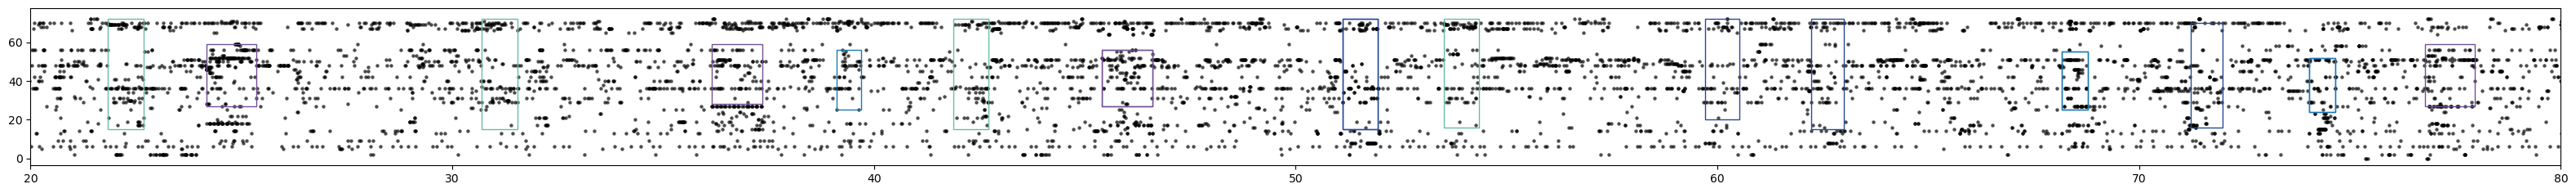

In [618]:
## load data back in to check it!

spikes_file= json_["save_path"] + json_["output_filename"]+".txt"
print(spikes_file)
neuron_ids, spike_times= [], []
with open(spikes_file) as f:
    for (i, line) in enumerate(f.readlines()):
        [neuron_id, spike_time] = line.split(' ', 1)
        spike_time = eval(spike_time.split('\n')[0])
        neuron_id = eval(neuron_id.split('\t')[0])
        spike_times.append(spike_time)
        neuron_ids.append(neuron_id)
        
spikes_df = pd.DataFrame({'neuron':neuron_ids,'timestamp':spike_times}) 
        

print(out_path +  mouse + "_insertion_spike_profiles_" + str(today))
implanted_data = pd.read_pickle(out_path +  mouse + "_insertion_spike_profiles_" + str(today))

# for loading color and order data from awake alignment 
region = 'striatum'
saved_data_path = os.path.join("Z:\projects\sequence_squad\organised_data\ppseq_analysis\ppseq_awake_analysis\plots\\" + mouse_session_recording, region) + '\\'



fig,ax= plt.subplots(1, 1,figsize=(40, 2.5))
ax.scatter(spikes_df.timestamp.values, no_nan_inserted_neuron_order ,marker = 'o', s=10, linewidth=0,color = 'black' ,alpha=0.7)
col_ = []
rects = []
implanted_seq_types = []
all_implanted_rectangles = []
for index, seq_type in enumerate(implanted_data.seq_type.values):
    timestamps = implanted_data.inserted_profile[index].timestamp.values
    neurons = implanted_data.inserted_profile[index].neuron.values

    left = min(timestamps)
    right = max(timestamps)
    
    implanted_neuron_order = neuron_permute_loc[(neurons-1).astype(int)]
    top = max(implanted_neuron_order)
    bottom = min(implanted_neuron_order)

    col_ = list(colors.values())[int(seq_type)]
    rects +=  [Rectangle((left, bottom), right-left, top-bottom, linewidth=1, edgecolor=col_, facecolor='none') ]
    
for rect in rects:
    ax.add_patch(rect)
ax.set_xlim([20,80])


# shuffle and save this out for shuffle insertions 

In [619]:

## do another circular shuffle and save this out as well 

spikes = no_nan_spike_insertion
neurons = no_nan_neuron_insertion


spikes_df = pd.DataFrame({'neuron': neurons, 'timestamp': spikes})

# find range:
time_range = 600
# Apply the circular shift to each neuron group
spikes_df_shifted = spikes_df.groupby('neuron').apply(circular_shift, time_range=time_range)
# Reset the index to flatten the MultiIndex created by groupby
spikes_df_shifted = spikes_df_shifted.reset_index(drop=True)
#Reorder the spikes for each neuron so that they are in time order
spikes_df_shifted = spikes_df_shifted.sort_values(by=['neuron', 'timestamp']).reset_index(drop=True) 

C:\Users\Emmett\AppData\Local\Temp\ipykernel_13248\869143145.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  spikes_df_shifted = spikes_df.groupby('neuron').apply(circular_shift, time_range=time_range)


save it out 

In [620]:

today = date.today()

out_path = r"Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\shuffled\\"
if not os.path.isdir(out_path):
    os.makedirs(out_path)
insertion_df.to_pickle(out_path +  mouse + "_insertion_spike_profiles_" + str(today))

model_dir = r'Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\shuffled\prepared_data\\'
CHECK_FOLDER = os.path.isdir(model_dir)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(model_dir)
    print("created folder : ", model_dir)

json_ = {'full_path_to_data': dat_path,
 'mouse_implant_recording': mouse_session_recording,
 'output_filename': mouse_session_recording, 
 'save_path': model_dir,
 'time_span': [[0,600]],
 'single_or_multiunits': 'both',
 'region': 'striatum',
 'use_emmett_curation': False,
 'max_firing_rate': 15.0,
 'align_to_zero': True,
 'shuffle': 'None',
 'visualise': True,
 'min_fano_factor': 0.5,
 'max_fano_factor': 12,
 'number_of_neurons':len(spikes_df_shifted.neuron.unique()) }

params_filename= save_params_as_json(json_, json_["save_path"], "params_"+json_["output_filename"]+".json")



spike_times = create_spike_time_vectors(spikes_df_shifted.timestamp.values,spikes_df_shifted.neuron.values)

data_filename = write_text_file(spikes=spike_times, filename= json_["save_path"] + json_["output_filename"]+".txt") 

print(f"    • data '.txt' file saved to:          {data_filename}")
print(f"    • parameters '.json' file saved to:   {params_filename}")

    • data '.txt' file saved to:          Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\shuffled\prepared_data\\270_1_3.txt
    • parameters '.json' file saved to:   Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\shuffled\prepared_data\\params_270_1_3.json


load back in to check all is okay 

Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\shuffled\prepared_data\\270_1_3.txt
Z:\projects\sequence_squad\revision_data\emmett_revisions\circular_shuffle\synthetic_data\shuffled\\270_1_3_insertion_spike_profiles_2024-11-15


(60.0, 100.0)

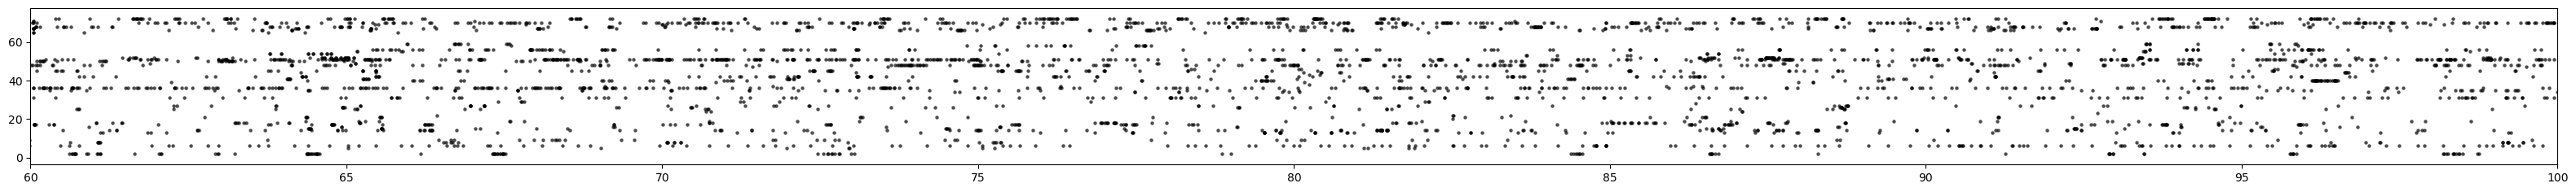

In [621]:
## load data back in to check it!

spikes_file= json_["save_path"] + json_["output_filename"]+".txt"
print(spikes_file)
neuron_ids, spike_times= [], []
with open(spikes_file) as f:
    for (i, line) in enumerate(f.readlines()):
        [neuron_id, spike_time] = line.split(' ', 1)
        spike_time = eval(spike_time.split('\n')[0])
        neuron_id = eval(neuron_id.split('\t')[0])
        spike_times.append(spike_time)
        neuron_ids.append(neuron_id)
        
spikes_df = pd.DataFrame({'neuron':neuron_ids,'timestamp':spike_times}) 
        

print(out_path +  mouse + "_insertion_spike_profiles_" + str(today))
implanted_data = pd.read_pickle(out_path +  mouse + "_insertion_spike_profiles_" + str(today))

# for loading color and order data from awake alignment 
region = 'striatum'
saved_data_path = os.path.join("Z:\projects\sequence_squad\organised_data\ppseq_analysis\ppseq_awake_analysis\plots\\" + mouse_session_recording, region) + '\\'



fig,ax= plt.subplots(1, 1,figsize=(40, 2.5))
ax.scatter(spike_times, no_nan_inserted_neuron_order ,marker = 'o', s=10, linewidth=0,color = 'black' ,alpha=0.7)

ax.set_xlim([60,100])


In [622]:
for awake_neuron in spikes_seq_type_adjusted.neuron.unique():
    if not awake_neuron in np.unique(no_nan_neuron_insertion):
        print(awake_neuron)
        no_nan_neuron_insertion += [awake_neuron]
        no_nan_spike_insertion += [0.1]
        no_nan_inserted_neuron_order += [np.unique(no_nan_inserted_neuron_order)[-1] + 1]


In [623]:
for neur in np.unique(neuron_ids):
    if not neur in spikes_seq_type_adjusted.neuron.unique():
        print(neur)